In [138]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_rows

60

In [139]:
kp = pd.read_csv("/Users/caldavis/Documents/GitHub/Capstone-project/Data folder/KenPom Team Metrics.csv")
#kp.head(10)
kp_conf_rat = pd.read_csv("/Users/caldavis/Documents/GitHub/Capstone-project/Data folder/KP_Conf_Ratings.csv")
kp_conf_rat = kp_conf_rat[["Year_Conf", "Conf_Abb", "Conf_Rk", "Conf_Full", "Conf_Rating"]]
kp_conf_rat.head(10)

,Year_Conf,Conf_Abb,Conf_Rk,Conf_Full,Conf_Rating
0,2023,Big 12,1,Big 12 Conference,17.99
1,2023,Big Ten,2,Big Ten Conference,14.88
2,2023,Big East,3,Big East Conference,13.95
3,2023,SEC,4,Southeastern Conference,12.57
4,2023,Pac-12,5,Pac 12 Conference,11.58
5,2023,MWC,6,Mountain West Conference,9.26
6,2023,ACC,7,Atlantic Coast Conference,8.58
7,2023,AAC,8,American Athletic Conference,6.72
8,2023,WCC,9,West Coast Conference,6.27
9,2023,CUSA,10,Conference USA,3.60


In [140]:
d = pd.read_csv("/Users/caldavis/Documents/GitHub/Capstone-project/Data folder/final_data_by_player_type.csv")
d = pd.merge(d, kp, left_on=['Team', 'year'], right_on=['TeamName', 'Season'], how='left')
d = pd.merge(d, kp, left_on=['Team_n1', 'year'], right_on=['TeamName', 'Season'], how='left')
df = pd.merge(d, kp, left_on=['Team_n1', 'year_n1'], right_on=['TeamName', 'Season'], how='left')
df = pd.merge(df, kp_conf_rat, left_on=['conf_abbr', 'year'], right_on=['Conf_Abb', 'Year_Conf'], how='left')
df = pd.merge(df, kp_conf_rat, left_on=['conf_abbr_n1', 'year'], right_on=['Conf_Abb', 'Year_Conf'], how='left')
df = pd.merge(df, kp_conf_rat, left_on=['conf_abbr_n1', 'year_n1'], right_on=['Conf_Abb', 'Year_Conf'], how='left')
df = df.replace(to_replace="NO IDEA", value=0)
df = df.replace(to_replace="---", value=0)
df = df.fillna(0)
pd.options.display.max_columns
#pd.options.display.max_rows
df



/var/folders/cq/16hkxgp926d466c0g9jzx2900000gq/T/ipykernel_83214/1518560658.py:1: DtypeWarning: Columns (13,16,38,144,147,169) have mixed types. Specify dtype option on import or set low_memory=False.
  d = pd.read_csv("/Users/caldavis/Documents/GitHub/Capstone-project/Data folder/final_data_by_player_type.csv")


,Unnamed: 0,player_type,Team,Team_n1,Unnamed..0_x,Player.Name,season,conf_abbr,games,games_started,mp_per_g,fg_per_g,fga_per_g,fg_pct,fg2_per_g,fg2a_per_g,fg2_pct,fg3_per_g,fg3a_per_g,fg3_pct,ft_per_g,fta_per_g,ft_pct,orb_per_g,drb_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,tov_per_g,pf_per_g,pts_per_g,sos,mp,fg,fga,fg2,fg2a,fg2_pct.1,fg3,fg3a,ft,fta,orb,drb,trb,ast,stl,blk,tov,pf,pts,fg_per_min,fga_per_min,fg2_per_min,fg2a_per_min,fg3_per_min,fg3a_per_min,ft_per_min,fta_per_min,trb_per_min,ast_per_min,stl_per_min,blk_per_min,tov_per_min,pf_per_min,pts_per_min,fg_per_poss,fga_per_poss,fg2_per_poss,fg2a_per_poss,fg3_per_poss,fg3a_per_poss,ft_per_poss,fta_per_poss,trb_per_poss,ast_per_poss,stl_per_poss,blk_per_poss,tov_per_poss,pf_per_poss,pts_per_poss,off_rtg,def_rtg,per,ts_pct,efg_pct,fg3a_per_fga_pct,fta_per_fga_pct,pprod,orb_pct,drb_pct,trb_pct,ast_pct,stl_pct,blk_pct,tov_pct,usg_pct,ows,dws,ws,ws_per_40,obpm,dbpm,bpm,year,Ht,Wt,Yr,G,S,X.Min,ORtg,X.Poss,X.Shots,eFG.,TS.,OR.,DR.,ARate,TORate,Blk.,Stl.,FC.40,FD.40,FTRate,FTM.A,Pct,X2PM.A,Pct.1,X3PM.A,Pct.2,X.Pct,X.2PM.A,X.Pct.1,Unnamed..0_x_n1,Player.Name_n1,season_n1,conf_abbr_n1,games_n1,games_started_n1,mp_per_g_n1,fg_per_g_n1,fga_per_g_n1,fg_pct_n1,fg2_per_g_n1,fg2a_per_g_n1,fg2_pct_n1,fg3_per_g_n1,fg3a_per_g_n1,fg3_pct_n1,ft_per_g_n1,fta_per_g_n1,ft_pct_n1,orb_per_g_n1,drb_per_g_n1,trb_per_g_n1,ast_per_g_n1,stl_per_g_n1,blk_per_g_n1,tov_per_g_n1,pf_per_g_n1,pts_per_g_n1,sos_n1,mp_n1,fg_n1,fga_n1,fg2_n1,fg2a_n1,fg2_pct.1_n1,fg3_n1,fg3a_n1,ft_n1,fta_n1,orb_n1,drb_n1,trb_n1,ast_n1,stl_n1,blk_n1,tov_n1,pf_n1,pts_n1,fg_per_min_n1,fga_per_min_n1,fg2_per_min_n1,fg2a_per_min_n1,fg3_per_min_n1,fg3a_per_min_n1,ft_per_min_n1,fta_per_min_n1,trb_per_min_n1,ast_per_min_n1,stl_per_min_n1,blk_per_min_n1,tov_per_min_n1,pf_per_min_n1,pts_per_min_n1,fg_per_poss_n1,fga_per_poss_n1,fg2_per_poss_n1,fg2a_per_poss_n1,fg3_per_poss_n1,fg3a_per_poss_n1,ft_per_poss_n1,fta_per_poss_n1,trb_per_poss_n1,ast_per_poss_n1,stl_per_poss_n1,blk_per_poss_n1,tov_per_poss_n1,pf_per_poss_n1,pts_per_poss_n1,off_rtg_n1,def_rtg_n1,per_n1,ts_pct_n1,efg_pct_n1,fg3a_per_fga_pct_n1,fta_per_fga_pct_n1,pprod_n1,orb_pct_n1,drb_pct_n1,trb_pct_n1,ast_pct_n1,stl_pct_n1,blk_pct_n1,tov_pct_n1,usg_pct_n1,ows_n1,dws_n1,ws_n1,ws_per_40_n1,obpm_n1,dbpm_n1,bpm_n1,year_n1,Ht_n1,Wt_n1,Yr_n1,G_n1,S_n1,X.Min_n1,ORtg_n1,X.Poss_n1,X.Shots_n1,eFG._n1,TS._n1,OR._n1,DR._n1,ARate_n1,TORate_n1,Blk._n1,Stl._n1,FC.40_n1,FD.40_n1,FTRate_n1,FTM.A_n1,Pct_n1,X2PM.A_n1,Pct.1_n1,X3PM.A_n1,Pct.2_n1,X.Pct_n1,X.2PM.A_n1,X.Pct.1_n1,Season_x,TeamName_x,TeamName 2_x,Tempo_x,RankTempo_x,AdjTempo_x,RankAdjTempo_x,OE_x,RankOE_x,AdjOE_x,RankAdjOE_x,DE_x,RankDE_x,AdjDE_x,RankAdjDE_x,AdjEM_x,RankAdjEM_x,seed_x,Season_y,TeamName_y,TeamName 2_y,Tempo_y,RankTempo_y,AdjTempo_y,RankAdjTempo_y,OE_y,RankOE_y,AdjOE_y,RankAdjOE_y,DE_y,RankDE_y,AdjDE_y,RankAdjDE_y,AdjEM_y,RankAdjEM_y,seed_y,Season,TeamName,TeamName 2,Tempo,RankTempo,AdjTempo,RankAdjTempo,OE,RankOE,AdjOE,RankAdjOE,DE,RankDE,AdjDE,RankAdjDE,AdjEM,RankAdjEM,seed,Year_Conf_x,Conf_Abb_x,Conf_Rk_x,Conf_Full_x,Conf_Rating_x,Year_Conf_y,Conf_Abb_y,Conf_Rk_y,Conf_Full_y,Conf_Rating_y,Year_Conf,Conf_Abb,Conf_Rk,Conf_Full,Conf_Rating
0,1,1,JACKSONVILLE,JACKSONVILLE,16199.0,aamahne-santos-1,2018-19,A-Sun,32,31,28.6,2.3,6.3,0.361,0.9,2.3,0.4,1.3,4.0,0.339,0.9,0.9,0.966,0.3,1.5,1.8,2.4,0.6,0.1,1.5,1.3,6.8,-4.74,915,73.0,202.0,30.0,75.0,0.4,43.0,127.0,28.0,29.0,10.0,47.0,57,78.0,20.0,2.0,49.0,43.0,217.0,3.2,8.8,1.3,3.3,1.9,5.6,1.2,1.3,2.5,3.4,0.9,0.1,2.1,1.9,9.5,4.4,12.0,1.8,4.5,2.6,7.6,1.7,1.7,3.4,4.7,1.2,0.1,2.9,2.6,12.9,98.5,109.4,7.9,0.503,0.468,0.629,0.144,227.0,1.2,5.8,3.5,13.9,1.2,0.2,18.5,13.8,0.5,0.6,1.1,0.048,-2.9,-1.7,-4.7,2019.0,70,165.0,Jr,30,29.0,73.4,94.5,13.8,14.6,44.3,48.1,1.2,5.7,13.6,20.8,0.2,1.2,1.9,1.9,15.0,28-29,0.966,27-72,0.375,39-121,0.322,0.966,27-72,0.375,16200.0,aamahne-santos-1,2019-20,A-Sun,30,29,29.6,2.9,7.7,0.372,1.5,3.6,0.413,1.4,4.1,0.336,0.8,1.1,0.719,0.2,2.1,2.3,2.6,0.8,0.0,1.7,1.5,

In [141]:
#df[(df['games']>39) | (df['games_n1']>39)]
df[((df['games']>39) & (df['year']==2023)) | ((df['games_n1']>39) & (df['year_n1']==2023)) | 
   ((df['games']>40) & (df['year']==2022)) | ((df['games_n1']>40) & (df['year_n1']==2022)) | 
   ((df['games']>33) & (df['year']==2021)) | ((df['games_n1']>33) & (df['year_n1']==2021)) | 
   ((df['games']>35) & (df['year']==2020)) | ((df['games_n1']>35) & (df['year_n1']==2020)) | 
   ((df['games']>40) & (df['year']==2019)) | ((df['games_n1']>40) & (df['year_n1']==2019))]

,Unnamed: 0,player_type,Team,Team_n1,Unnamed..0_x,Player.Name,season,conf_abbr,games,games_started,mp_per_g,fg_per_g,fga_per_g,fg_pct,fg2_per_g,fg2a_per_g,fg2_pct,fg3_per_g,fg3a_per_g,fg3_pct,ft_per_g,fta_per_g,ft_pct,orb_per_g,drb_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,tov_per_g,pf_per_g,pts_per_g,sos,mp,fg,fga,fg2,fg2a,fg2_pct.1,fg3,fg3a,ft,fta,orb,drb,trb,ast,stl,blk,tov,pf,pts,fg_per_min,fga_per_min,fg2_per_min,fg2a_per_min,fg3_per_min,fg3a_per_min,ft_per_min,fta_per_min,trb_per_min,ast_per_min,stl_per_min,blk_per_min,tov_per_min,pf_per_min,pts_per_min,fg_per_poss,fga_per_poss,fg2_per_poss,fg2a_per_poss,fg3_per_poss,fg3a_per_poss,ft_per_poss,fta_per_poss,trb_per_poss,ast_per_poss,stl_per_poss,blk_per_poss,tov_per_poss,pf_per_poss,pts_per_poss,off_rtg,def_rtg,per,ts_pct,efg_pct,fg3a_per_fga_pct,fta_per_fga_pct,pprod,orb_pct,drb_pct,trb_pct,ast_pct,stl_pct,blk_pct,tov_pct,usg_pct,ows,dws,ws,ws_per_40,obpm,dbpm,bpm,year,Ht,Wt,Yr,G,S,X.Min,ORtg,X.Poss,X.Shots,eFG.,TS.,OR.,DR.,ARate,TORate,Blk.,Stl.,FC.40,FD.40,FTRate,FTM.A,Pct,X2PM.A,Pct.1,X3PM.A,Pct.2,X.Pct,X.2PM.A,X.Pct.1,Unnamed..0_x_n1,Player.Name_n1,season_n1,conf_abbr_n1,games_n1,games_started_n1,mp_per_g_n1,fg_per_g_n1,fga_per_g_n1,fg_pct_n1,fg2_per_g_n1,fg2a_per_g_n1,fg2_pct_n1,fg3_per_g_n1,fg3a_per_g_n1,fg3_pct_n1,ft_per_g_n1,fta_per_g_n1,ft_pct_n1,orb_per_g_n1,drb_per_g_n1,trb_per_g_n1,ast_per_g_n1,stl_per_g_n1,blk_per_g_n1,tov_per_g_n1,pf_per_g_n1,pts_per_g_n1,sos_n1,mp_n1,fg_n1,fga_n1,fg2_n1,fg2a_n1,fg2_pct.1_n1,fg3_n1,fg3a_n1,ft_n1,fta_n1,orb_n1,drb_n1,trb_n1,ast_n1,stl_n1,blk_n1,tov_n1,pf_n1,pts_n1,fg_per_min_n1,fga_per_min_n1,fg2_per_min_n1,fg2a_per_min_n1,fg3_per_min_n1,fg3a_per_min_n1,ft_per_min_n1,fta_per_min_n1,trb_per_min_n1,ast_per_min_n1,stl_per_min_n1,blk_per_min_n1,tov_per_min_n1,pf_per_min_n1,pts_per_min_n1,fg_per_poss_n1,fga_per_poss_n1,fg2_per_poss_n1,fg2a_per_poss_n1,fg3_per_poss_n1,fg3a_per_poss_n1,ft_per_poss_n1,fta_per_poss_n1,trb_per_poss_n1,ast_per_poss_n1,stl_per_poss_n1,blk_per_poss_n1,tov_per_poss_n1,pf_per_poss_n1,pts_per_poss_n1,off_rtg_n1,def_rtg_n1,per_n1,ts_pct_n1,efg_pct_n1,fg3a_per_fga_pct_n1,fta_per_fga_pct_n1,pprod_n1,orb_pct_n1,drb_pct_n1,trb_pct_n1,ast_pct_n1,stl_pct_n1,blk_pct_n1,tov_pct_n1,usg_pct_n1,ows_n1,dws_n1,ws_n1,ws_per_40_n1,obpm_n1,dbpm_n1,bpm_n1,year_n1,Ht_n1,Wt_n1,Yr_n1,G_n1,S_n1,X.Min_n1,ORtg_n1,X.Poss_n1,X.Shots_n1,eFG._n1,TS._n1,OR._n1,DR._n1,ARate_n1,TORate_n1,Blk._n1,Stl._n1,FC.40_n1,FD.40_n1,FTRate_n1,FTM.A_n1,Pct_n1,X2PM.A_n1,Pct.1_n1,X3PM.A_n1,Pct.2_n1,X.Pct_n1,X.2PM.A_n1,X.Pct.1_n1,Season_x,TeamName_x,TeamName 2_x,Tempo_x,RankTempo_x,AdjTempo_x,RankAdjTempo_x,OE_x,RankOE_x,AdjOE_x,RankAdjOE_x,DE_x,RankDE_x,AdjDE_x,RankAdjDE_x,AdjEM_x,RankAdjEM_x,seed_x,Season_y,TeamName_y,TeamName 2_y,Tempo_y,RankTempo_y,AdjTempo_y,RankAdjTempo_y,OE_y,RankOE_y,AdjOE_y,RankAdjOE_y,DE_y,RankDE_y,AdjDE_y,RankAdjDE_y,AdjEM_y,RankAdjEM_y,seed_y,Season,TeamName,TeamName 2,Tempo,RankTempo,AdjTempo,RankAdjTempo,OE,RankOE,AdjOE,RankAdjOE,DE,RankDE,AdjDE,RankAdjDE,AdjEM,RankAdjEM,seed,Year_Conf_x,Conf_Abb_x,Conf_Rk_x,Conf_Full_x,Conf_Rating_x,Year_Conf_y,Conf_Abb_y,Conf_Rk_y,Conf_Full_y,Conf_Rating_y,Year_Conf,Conf_Abb,Conf_Rk,Conf_Full,Conf_Rating
110,111,1,LITTLE ROCK,LITTLE ROCK,28303.0,admir-besovic-1,2020-21,Sun Belt,23,5,12.0,0.9,2.2,0.4,0.9,2.1,0.408,0.0,0.0,0,0.3,0.5,0.667,1.0,1.0,2.0,0.4,0.2,0.3,1.0,1.4,2.1,-0.73,277,20.0,50.0,20.0,49.0,0.408,0.0,1.0,8.0,12.0,24.0,22.0,46,10.0,4.0,6.0,22.0,32.0,48.0,2.9,7.2,2.9,7.1,0.0,0.1,1.2,1.7,6.6,1.4,0.6,0.9,3.2,4.6,6.9,4.2,10.6,4.2,10.4,0.0,0.2,1.7,2.5,9.8,2.1,0.8,1.3,4.7,6.8,10.2,80.8,110.1,5.4,0.431,0.400,0.020,0.240,59.0,10.4,9.9,10.2,7.2,0.8,2.6,28.3,14.7,-0.2,0.2,0.0,-0.006,-5.6,-3.3,-8.8,2021.0,84,240.0,Sr,11,0.0,9.6,92.3,17.2,16.3,52.4,56.5,5.2,18.5,6.4,28.2,1.2,0.6,2.1,3.2,38.1,6-8,0.75,11-21,0.524,0-0,0.000,0.750,11-21,0.524,28304.0,admir-besovic-1,2021-22,Sun Belt,66,5,7.7,0.8,1.7,0.477,0.8,1.7,0.482,0.0,0.0,0,0.3,0.4,0.704,0.6,0.7,1.2,0.3,0.1,0.1,0.6,1.0,1.9,-2.36,507,5

array([[<Axes: title={'center': 'games'}>]], dtype=object)

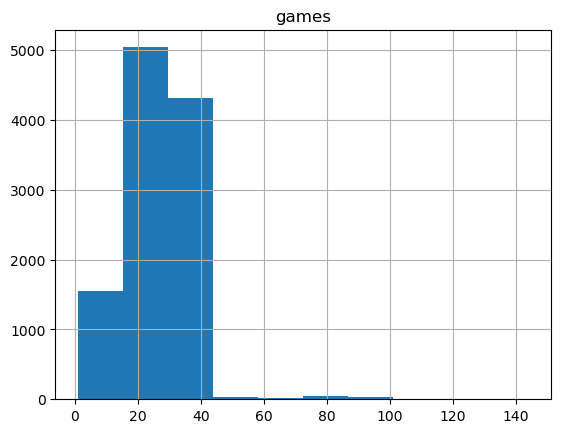

In [142]:
games_df = pd.DataFrame(zip(df.games), columns=['games'])
games_df
df.hist(column='games')


In [143]:
team_df = df[["Team", "Team_n1"]]
team_df_n = team_df[["Team"]]
team_df_n = team_df_n.sort_values(by=["Team"])

team_df_n1 = team_df[["Team_n1"]]
team_df_n1 = team_df_n1.sort_values(by=["Team_n1"])

#print(len(team_df.Team.unique()))
#print(list(team_df_n1.Team_n1.unique()))

In [144]:
# Converts to numeric
df[['games', 'games_started', 'mp_per_g', 'fg_per_g', 'fga_per_g', 'fg_pct', 'fg2_per_g', 'fg2a_per_g', 'fg2_pct', 'fg3_per_g', 'fg3a_per_g', 'fg3_pct', 'ft_per_g', 'fta_per_g', 'ft_pct', 'orb_per_g', 'drb_per_g', 'trb_per_g', 'ast_per_g', 'stl_per_g', 'blk_per_g', 'tov_per_g', 'pf_per_g', 'pts_per_g', 'sos', 'mp', 'fg', 'fga', 'fg2', 'fg2a', 'fg2_pct.1', 'fg3', 'fg3a', 'ft', 'fta', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts', 'fg_per_min', 'fga_per_min', 'fg2_per_min', 'fg2a_per_min', 'fg3_per_min', 'fg3a_per_min', 'ft_per_min', 'fta_per_min', 'trb_per_min', 'ast_per_min', 'stl_per_min', 'blk_per_min', 'tov_per_min', 'pf_per_min', 'pts_per_min', 'fg_per_poss', 'fga_per_poss', 'fg2_per_poss', 'fg2a_per_poss', 'fg3_per_poss', 'fg3a_per_poss', 'ft_per_poss', 'fta_per_poss', 'trb_per_poss', 'ast_per_poss', 'stl_per_poss', 'blk_per_poss', 'tov_per_poss', 'pf_per_poss', 'pts_per_poss', 'off_rtg', 'def_rtg', 'per', 'ts_pct', 'efg_pct', 'fg3a_per_fga_pct', 'fta_per_fga_pct', 'pprod', 'orb_pct', 'drb_pct', 'trb_pct', 'ast_pct', 'stl_pct', 'blk_pct', 'tov_pct', 'usg_pct', 'ows', 'dws', 'ws', 'ws_per_40', 'obpm', 'dbpm', 'bpm', 'year', 'Ht', 'Wt', 'G', 'S', 'X.Min', 'ORtg', 'X.Poss', 'X.Shots', 'games_n1', 'games_started_n1', 'mp_per_g_n1', 'fg_per_g_n1', 'fga_per_g_n1', 'fg_pct_n1', 'fg2_per_g_n1', 'fg2a_per_g_n1', 'fg2_pct_n1', 'fg3_per_g_n1', 'fg3a_per_g_n1', 'fg3_pct_n1', 'ft_per_g_n1', 'fta_per_g_n1', 'ft_pct_n1', 'orb_per_g_n1', 'drb_per_g_n1', 'trb_per_g_n1', 'ast_per_g_n1', 'stl_per_g_n1', 'blk_per_g_n1', 'tov_per_g_n1', 'pf_per_g_n1', 'pts_per_g_n1', 'sos_n1', 'mp_n1', 'fg_n1', 'fga_n1', 'fg2_n1', 'fg2a_n1', 'fg2_pct.1_n1', 'fg3_n1', 'fg3a_n1', 'ft_n1', 'fta_n1', 'orb_n1', 'drb_n1', 'trb_n1', 'ast_n1', 'stl_n1', 'blk_n1', 'tov_n1', 'pf_n1', 'pts_n1', 'fg_per_min_n1', 'fga_per_min_n1', 'fg2_per_min_n1', 'fg2a_per_min_n1', 'fg3_per_min_n1', 'fg3a_per_min_n1', 'ft_per_min_n1', 'fta_per_min_n1', 'trb_per_min_n1', 'ast_per_min_n1', 'stl_per_min_n1', 'blk_per_min_n1', 'tov_per_min_n1', 'pf_per_min_n1', 'pts_per_min_n1', 'fg_per_poss_n1', 'fga_per_poss_n1', 'fg2_per_poss_n1', 'fg2a_per_poss_n1', 'fg3_per_poss_n1', 'fg3a_per_poss_n1', 'ft_per_poss_n1', 'fta_per_poss_n1', 'trb_per_poss_n1', 'ast_per_poss_n1', 'stl_per_poss_n1', 'blk_per_poss_n1', 'tov_per_poss_n1', 'pf_per_poss_n1', 'pts_per_poss_n1', 'off_rtg_n1', 'def_rtg_n1', 'per_n1', 'ts_pct_n1', 'efg_pct_n1', 'fg3a_per_fga_pct_n1', 'fta_per_fga_pct_n1', 'pprod_n1', 'orb_pct_n1', 'drb_pct_n1', 'trb_pct_n1', 'ast_pct_n1', 'stl_pct_n1', 'blk_pct_n1', 'tov_pct_n1', 'usg_pct_n1', 'ows_n1', 'dws_n1', 'ws_n1', 'ws_per_40_n1', 'obpm_n1', 'dbpm_n1', 'bpm_n1', 'year_n1', 'Ht_n1', 'Wt_n1', 'G_n1', 'S_n1', 'X.Min_n1', 'ORtg_n1', 'X.Poss_n1', 'X.Shots_n1']] = df[['games', 'games_started', 'mp_per_g', 'fg_per_g', 'fga_per_g', 'fg_pct', 'fg2_per_g', 'fg2a_per_g', 'fg2_pct', 'fg3_per_g', 'fg3a_per_g', 'fg3_pct', 'ft_per_g', 'fta_per_g', 'ft_pct', 'orb_per_g', 'drb_per_g', 'trb_per_g', 'ast_per_g', 'stl_per_g', 'blk_per_g', 'tov_per_g', 'pf_per_g', 'pts_per_g', 'sos', 'mp', 'fg', 'fga', 'fg2', 'fg2a', 'fg2_pct.1', 'fg3', 'fg3a', 'ft', 'fta', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts', 'fg_per_min', 'fga_per_min', 'fg2_per_min', 'fg2a_per_min', 'fg3_per_min', 'fg3a_per_min', 'ft_per_min', 'fta_per_min', 'trb_per_min', 'ast_per_min', 'stl_per_min', 'blk_per_min', 'tov_per_min', 'pf_per_min', 'pts_per_min', 'fg_per_poss', 'fga_per_poss', 'fg2_per_poss', 'fg2a_per_poss', 'fg3_per_poss', 'fg3a_per_poss', 'ft_per_poss', 'fta_per_poss', 'trb_per_poss', 'ast_per_poss', 'stl_per_poss', 'blk_per_poss', 'tov_per_poss', 'pf_per_poss', 'pts_per_poss', 'off_rtg', 'def_rtg', 'per', 'ts_pct', 'efg_pct', 'fg3a_per_fga_pct', 'fta_per_fga_pct', 'pprod', 'orb_pct', 'drb_pct', 'trb_pct', 'ast_pct', 'stl_pct', 'blk_pct', 'tov_pct', 'usg_pct', 'ows', 'dws', 'ws', 'ws_per_40', 'obpm', 'dbpm', 'bpm', 'year', 'Ht', 'Wt', 'G', 'S', 'X.Min', 'ORtg', 'X.Poss', 'X.Shots', 'games_n1', 'games_started_n1', 'mp_per_g_n1', 'fg_per_g_n1', 'fga_per_g_n1', 'fg_pct_n1', 'fg2_per_g_n1', 'fg2a_per_g_n1', 'fg2_pct_n1', 'fg3_per_g_n1', 'fg3a_per_g_n1', 'fg3_pct_n1', 'ft_per_g_n1', 'fta_per_g_n1', 'ft_pct_n1', 'orb_per_g_n1', 'drb_per_g_n1', 'trb_per_g_n1', 'ast_per_g_n1', 'stl_per_g_n1', 'blk_per_g_n1', 'tov_per_g_n1', 'pf_per_g_n1', 'pts_per_g_n1', 'sos_n1', 'mp_n1', 'fg_n1', 'fga_n1', 'fg2_n1', 'fg2a_n1', 'fg2_pct.1_n1', 'fg3_n1', 'fg3a_n1', 'ft_n1', 'fta_n1', 'orb_n1', 'drb_n1', 'trb_n1', 'ast_n1', 'stl_n1', 'blk_n1', 'tov_n1', 'pf_n1', 'pts_n1', 'fg_per_min_n1', 'fga_per_min_n1', 'fg2_per_min_n1', 'fg2a_per_min_n1', 'fg3_per_min_n1', 'fg3a_per_min_n1', 'ft_per_min_n1', 'fta_per_min_n1', 'trb_per_min_n1', 'ast_per_min_n1', 'stl_per_min_n1', 'blk_per_min_n1', 'tov_per_min_n1', 'pf_per_min_n1', 'pts_per_min_n1', 'fg_per_poss_n1', 'fga_per_poss_n1', 'fg2_per_poss_n1', 'fg2a_per_poss_n1', 'fg3_per_poss_n1', 'fg3a_per_poss_n1', 'ft_per_poss_n1', 'fta_per_poss_n1', 'trb_per_poss_n1', 'ast_per_poss_n1', 'stl_per_poss_n1', 'blk_per_poss_n1', 'tov_per_poss_n1', 'pf_per_poss_n1', 'pts_per_poss_n1', 'off_rtg_n1', 'def_rtg_n1', 'per_n1', 'ts_pct_n1', 'efg_pct_n1', 'fg3a_per_fga_pct_n1', 'fta_per_fga_pct_n1', 'pprod_n1', 'orb_pct_n1', 'drb_pct_n1', 'trb_pct_n1', 'ast_pct_n1', 'stl_pct_n1', 'blk_pct_n1', 'tov_pct_n1', 'usg_pct_n1', 'ows_n1', 'dws_n1', 'ws_n1', 'ws_per_40_n1', 'obpm_n1', 'dbpm_n1', 'bpm_n1', 'year_n1', 'Ht_n1', 'Wt_n1', 'G_n1', 'S_n1', 'X.Min_n1', 'ORtg_n1', 'X.Poss_n1', 'X.Shots_n1']].apply(pd.to_numeric, errors="ignore")


In [145]:
conditions = [(df['X.Poss_n1']>=28.0), (df['X.Poss_n1']>=24.0), (df['X.Poss_n1']>=20.0), (df['X.Poss_n1']>=16), 
              (df['X.Poss_n1']>=12.0), (df['X.Poss_n1']<=12) & (df['X.Min_n1']>=10.0), (df['X.Min_n1']<10)]
#values = ['Go-To Guy', 'Major Contributor', 'Significant Contributor', 'Role Players', 'Limited Role', 'Nearly Invisible', 'Bench Warmer']
values = [0, 1, 2, 3, 4, 5, 6]
df['Contribution_n1'] = np.select(conditions, values)

/var/folders/cq/16hkxgp926d466c0g9jzx2900000gq/T/ipykernel_83214/1823136958.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Contribution_n1'] = np.select(conditions, values)


In [146]:
df_redshirt = df.loc[(df['games']<=10) & (df['games_started']/df['games']>=0.7)]
#& (df.games_started/df.games>=0.7)]
df_redshirt

,Unnamed: 0,player_type,Team,Team_n1,Unnamed..0_x,Player.Name,season,conf_abbr,games,games_started,mp_per_g,fg_per_g,fga_per_g,fg_pct,fg2_per_g,fg2a_per_g,fg2_pct,fg3_per_g,fg3a_per_g,fg3_pct,ft_per_g,fta_per_g,ft_pct,orb_per_g,drb_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,tov_per_g,pf_per_g,pts_per_g,sos,mp,fg,fga,fg2,fg2a,fg2_pct.1,fg3,fg3a,ft,fta,orb,drb,trb,ast,stl,blk,tov,pf,pts,fg_per_min,fga_per_min,fg2_per_min,fg2a_per_min,fg3_per_min,fg3a_per_min,ft_per_min,fta_per_min,trb_per_min,ast_per_min,stl_per_min,blk_per_min,tov_per_min,pf_per_min,pts_per_min,fg_per_poss,fga_per_poss,fg2_per_poss,fg2a_per_poss,fg3_per_poss,fg3a_per_poss,ft_per_poss,fta_per_poss,trb_per_poss,ast_per_poss,stl_per_poss,blk_per_poss,tov_per_poss,pf_per_poss,pts_per_poss,off_rtg,def_rtg,per,ts_pct,efg_pct,fg3a_per_fga_pct,fta_per_fga_pct,pprod,orb_pct,drb_pct,trb_pct,ast_pct,stl_pct,blk_pct,tov_pct,usg_pct,ows,dws,ws,ws_per_40,obpm,dbpm,bpm,year,Ht,Wt,Yr,G,S,X.Min,ORtg,X.Poss,X.Shots,eFG.,TS.,OR.,DR.,ARate,TORate,Blk.,Stl.,FC.40,FD.40,FTRate,FTM.A,Pct,X2PM.A,Pct.1,X3PM.A,Pct.2,X.Pct,X.2PM.A,X.Pct.1,Unnamed..0_x_n1,Player.Name_n1,season_n1,conf_abbr_n1,games_n1,games_started_n1,mp_per_g_n1,fg_per_g_n1,fga_per_g_n1,fg_pct_n1,fg2_per_g_n1,fg2a_per_g_n1,fg2_pct_n1,fg3_per_g_n1,fg3a_per_g_n1,fg3_pct_n1,ft_per_g_n1,fta_per_g_n1,ft_pct_n1,orb_per_g_n1,drb_per_g_n1,trb_per_g_n1,ast_per_g_n1,stl_per_g_n1,blk_per_g_n1,tov_per_g_n1,pf_per_g_n1,pts_per_g_n1,sos_n1,mp_n1,fg_n1,fga_n1,fg2_n1,fg2a_n1,fg2_pct.1_n1,fg3_n1,fg3a_n1,ft_n1,fta_n1,orb_n1,drb_n1,trb_n1,ast_n1,stl_n1,blk_n1,tov_n1,pf_n1,pts_n1,fg_per_min_n1,fga_per_min_n1,fg2_per_min_n1,fg2a_per_min_n1,fg3_per_min_n1,fg3a_per_min_n1,ft_per_min_n1,fta_per_min_n1,trb_per_min_n1,ast_per_min_n1,stl_per_min_n1,blk_per_min_n1,tov_per_min_n1,pf_per_min_n1,pts_per_min_n1,fg_per_poss_n1,fga_per_poss_n1,fg2_per_poss_n1,fg2a_per_poss_n1,fg3_per_poss_n1,fg3a_per_poss_n1,ft_per_poss_n1,fta_per_poss_n1,trb_per_poss_n1,ast_per_poss_n1,stl_per_poss_n1,blk_per_poss_n1,tov_per_poss_n1,pf_per_poss_n1,pts_per_poss_n1,off_rtg_n1,def_rtg_n1,per_n1,ts_pct_n1,efg_pct_n1,fg3a_per_fga_pct_n1,fta_per_fga_pct_n1,pprod_n1,orb_pct_n1,drb_pct_n1,trb_pct_n1,ast_pct_n1,stl_pct_n1,blk_pct_n1,tov_pct_n1,usg_pct_n1,ows_n1,dws_n1,ws_n1,ws_per_40_n1,obpm_n1,dbpm_n1,bpm_n1,year_n1,Ht_n1,Wt_n1,Yr_n1,G_n1,S_n1,X.Min_n1,ORtg_n1,X.Poss_n1,X.Shots_n1,eFG._n1,TS._n1,OR._n1,DR._n1,ARate_n1,TORate_n1,Blk._n1,Stl._n1,FC.40_n1,FD.40_n1,FTRate_n1,FTM.A_n1,Pct_n1,X2PM.A_n1,Pct.1_n1,X3PM.A_n1,Pct.2_n1,X.Pct_n1,X.2PM.A_n1,X.Pct.1_n1,Season_x,TeamName_x,TeamName 2_x,Tempo_x,RankTempo_x,AdjTempo_x,RankAdjTempo_x,OE_x,RankOE_x,AdjOE_x,RankAdjOE_x,DE_x,RankDE_x,AdjDE_x,RankAdjDE_x,AdjEM_x,RankAdjEM_x,seed_x,Season_y,TeamName_y,TeamName 2_y,Tempo_y,RankTempo_y,AdjTempo_y,RankAdjTempo_y,OE_y,RankOE_y,AdjOE_y,RankAdjOE_y,DE_y,RankDE_y,AdjDE_y,RankAdjDE_y,AdjEM_y,RankAdjEM_y,seed_y,Season,TeamName,TeamName 2,Tempo,RankTempo,AdjTempo,RankAdjTempo,OE,RankOE,AdjOE,RankAdjOE,DE,RankDE,AdjDE,RankAdjDE,AdjEM,RankAdjEM,seed,Year_Conf_x,Conf_Abb_x,Conf_Rk_x,Conf_Full_x,Conf_Rating_x,Year_Conf_y,Conf_Abb_y,Conf_Rk_y,Conf_Full_y,Conf_Rating_y,Year_Conf,Conf_Abb,Conf_Rk,Conf_Full,Conf_Rating,Contribution_n1
14,15,0,SOUTHERN ILLINOIS,GONZAGA,0.0,aaron-cook-2,2019-20,MVC,6,6,31.2,6.2,11.2,0.552,5.7,9.3,0.607,0.5,1.8,0.273,2.2,3.7,0.591,0.3,2.7,3.0,3.3,3.2,0.2,2.3,2.3,15.0,0.37,187,37.0,67.0,34.0,56.0,0.607,3.0,11.0,13.0,22.0,2.0,16.0,18,20.0,19.0,1.0,14.0,14.0,90.0,7.9,14.3,7.3,12.0,0.6,2.4,2.8,4.7,3.9,4.3,4.1,0.2,3.0,3.0,19.3,12.3,22.3,11.3,18.6,1.0,3.7,4.3,7.3,6.0,6.6,6.3,0.3,4.7,4.7,29.9,106.1,89.6,26.0,0.581,0.575,0.164,0.328,85.0,1.4,10.3,5.9,31.3,6.3,0.6,15.3,27.6,0.4,0.4,0.9,0.186,3.1,6.2,9.3,2020.0,74,185.0,Sr,5,5.0,13.2,105.3,26.3,27.2,59.8,60.2,0.8,7.5,27.2,17.4,0.7,6.8,2.7,4.6,39.3,13-22,0.591,29-48,0.604,3-8,0.375,0.591,29-48,0.604,0.0,aaron-cook-2,2020-21,WCC,30,1,13.4,1.5,3.0,0.500,1.0,1.7,0.620,0.5,1.3,0.350,0.8,1.2,0.657,0.2,1.4,1.6,1.7,0.9,0.1,1.1,1.3,4.2,5

In [147]:
#df = df.drop(df[(df['games']<=12) & (df['games_started']/df['games']>=0.6)].index)
df['Year_dif'] = df['year_n1']-df['year']
df['Team_AdjEM_dif'] = df['AdjEM_y']-df['AdjEM_x']
df['KP_Rk_Dif'] = df['RankAdjEM_y']-df['RankAdjEM_x']
df['Calc A'] = df['X.Min']*df['ORtg']
# Trying to flag red 
df_test1 = df[['player_type', 'X.Poss', 'X.Poss_n1', 'X.Min',
                'X.Min_n1', 'ORtg', 'Contribution_n1', 'Year_dif', 'stl_per_poss', 
                'blk_per_poss', 'DR.', 'KP_Rk_Dif', 'Calc A']]
#'Team_AdjEM_dif'
X = df_test1[['player_type', 'X.Poss', 'X.Min', 'X.Min_n1', 'ORtg', 
                      'Year_dif', 'stl_per_poss', 'blk_per_poss', 
                      'DR.', 'KP_Rk_Dif', 'Calc A']]
y = df_test1[['Contribution_n1']]

/var/folders/cq/16hkxgp926d466c0g9jzx2900000gq/T/ipykernel_83214/3416284705.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Year_dif'] = df['year_n1']-df['year']
/var/folders/cq/16hkxgp926d466c0g9jzx2900000gq/T/ipykernel_83214/3416284705.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Team_AdjEM_dif'] = df['AdjEM_y']-df['AdjEM_x']
/var/folders/cq/16hkxgp926d466c0g9jzx2900000gq/T/ipykernel_83214/3416284705.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.inser

In [148]:
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [149]:
print(len(y))
print(len(X_train), " ", len(X_test))

11042
7398   3644


In [150]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [151]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 40.61%


In [152]:
#y_test_df = pd.DataFrame({"Contribution_n1": y_test})
y_test["Predictions"]=y_pred
y_test["Better"] = np.where(y_test['Predictions']<=y_test['Contribution_n1'], 1, 0)
#y_test["Spot On"] = np.where(y_test['Predictions']==y_test['Contribution_n1'], 1, 0)
y_test["Worse"] = np.where(y_test['Predictions']>y_test['Contribution_n1'], 1, 0)
print(sum(list(y_test['Better'])))
print(len(list(y_test['Better'])))
print(round(sum(list(y_test['Better']))/len(list(y_test['Better'])), 2))
#y_test["Difference"] = y_test['Predictions']-y_test['Contribution_n1']
cond = y_test.groupby("Predictions").sum()
cond2 = y_test.groupby(["Contribution_n1", "Predictions"]).count()
cond2


2500
3644
0.69


Better  Worse
Contribution_n1 Predictions               
0               0                36     36
                1                58     58
                2                45     45
                3                24     24
                4                 3      3
1               0                30     30
                1               148    148
                2               158    158
                3                82     82
                4                11     11
                6                 3      3
2               0                15     15
                1                98     98
                2               355    355
                3               316    316
                4                67     67
                5                 5      5
                6                 7      7
3               0                 2      2
                1                36     36
                2               228    228
                3               565    565
                4               265    265
                5                19     19
                6                11     11
4               0                 1      1
                1                12     12
                2                62     62
                3               336    336
                4               292    292
                5                46     46
                6                23     23
5               1                 1      1
                2                 5      5
                3                53     53
                4                92     92
                5                58     58
                6                 1      1
6               1                 3      3
                2                 1      1
                3                11     11
                4                34     34
                6                26     26

In [153]:
cond

,Contribution_n1,Better,Worse
Predictions,,,
0,70,84,0
1,523,298,58
2,1831,651,203
3,4084,965,422
4,2772,418,346
5,541,58,70
6,303,26,45


In [154]:
#frames = [y_test, pred_df]
#comp = pd.concat([y_test, pred_df])
#comp

Transfer Models

In [155]:
df_transfer = df[df['player_type']==0]
#df_transfer['Year_dif'] = df_transfer['year_n1']-df_transfer['year']
#df_transfer
df_test_transfer = df_transfer[['player_type', 'X.Poss', 'X.Poss_n1', 'X.Min',
                'X.Min_n1', 'ORtg', 'Contribution_n1', 'Year_dif', 'stl_per_poss', 
                'blk_per_poss', 'DR.', 'AdjEM_x']]
Xt = df_test_transfer[['X.Poss', 'X.Min', 'X.Min_n1', 'ORtg', 
                      'Year_dif', 'stl_per_poss', 'blk_per_poss', 
                      'DR.', 'AdjEM_x']]
yt = df_test_transfer[['Contribution_n1']]

In [156]:
seed = 7
test_size = 0.33
Xt_train, Xt_test, yt_train, yt_test = train_test_split(Xt, yt, test_size=test_size, random_state=seed)

In [157]:
model = XGBClassifier()
model.fit(Xt_train, yt_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [158]:
yt_pred = model.predict(Xt_test)
predictionst = [round(value) for value in yt_pred]
accuracyt = accuracy_score(yt_test, predictionst)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 40.61%


In [159]:
df.Yr_n1.unique()

array(['Sr', 'Jr', 'So', 'Fr'], dtype=object)

In [160]:
new = pd.DataFrame(zip(df.Ht), columns=['Ht'])
ht_df = new.groupby(['Ht']).size()
ht_df

Ht
62       2
66       5
67      13
68      40
69      59
70     124
71     172
72     471
73     594
74     822
75    1024
76    1107
77    1200
78    1093
79    1215
80    1103
81     921
82     581
83     262
84     139
85      68
86      11
87      10
88       5
89       1
dtype: int64

In [161]:
new1 = pd.DataFrame(zip(df.Wt), columns=['Wt'])
wt_df = new1.groupby(['Wt']).size()
wt_df

Wt
0.0      108
139.0      1
140.0     10
145.0     13
148.0      1
        ... 
295.0      5
299.0      1
300.0      6
305.0      2
350.0      1
Length: 135, dtype: int64

In [185]:
# All In One Go

# Prep initial df
d = pd.read_csv("/Users/caldavis/Documents/GitHub/Capstone-project/Data folder/final_data_by_player_type.csv")
d = pd.merge(d, kp, left_on=['Team', 'year'], right_on=['TeamName', 'Season'], how='left')
d = pd.merge(d, kp, left_on=['Team_n1', 'year'], right_on=['TeamName', 'Season'], how='left')
df = pd.merge(d, kp, left_on=['Team_n1', 'year_n1'], right_on=['TeamName', 'Season'], how='left')
df = pd.merge(df, kp_conf_rat, left_on=['conf_abbr', 'year'], right_on=['Conf_Abb', 'Year_Conf'], how='left')
df = pd.merge(df, kp_conf_rat, left_on=['conf_abbr_n1', 'year'], right_on=['Conf_Abb', 'Year_Conf'], how='left')
df = pd.merge(df, kp_conf_rat, left_on=['conf_abbr_n1', 'year_n1'], right_on=['Conf_Abb', 'Year_Conf'], how='left')
df = df.replace(to_replace="NO IDEA", value=0)
df = df.replace(to_replace="---", value=0)
df = df.fillna(0)

# Convert to Numeric
df[['games', 'games_started', 'mp_per_g', 'fg_per_g', 'fga_per_g', 'fg_pct', 'fg2_per_g', 'fg2a_per_g', 'fg2_pct', 'fg3_per_g', 'fg3a_per_g', 'fg3_pct', 'ft_per_g', 'fta_per_g', 'ft_pct', 'orb_per_g', 'drb_per_g', 'trb_per_g', 'ast_per_g', 'stl_per_g', 'blk_per_g', 'tov_per_g', 'pf_per_g', 'pts_per_g', 'sos', 'mp', 'fg', 'fga', 'fg2', 'fg2a', 'fg2_pct.1', 'fg3', 'fg3a', 'ft', 'fta', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts', 'fg_per_min', 'fga_per_min', 'fg2_per_min', 'fg2a_per_min', 'fg3_per_min', 'fg3a_per_min', 'ft_per_min', 'fta_per_min', 'trb_per_min', 'ast_per_min', 'stl_per_min', 'blk_per_min', 'tov_per_min', 'pf_per_min', 'pts_per_min', 'fg_per_poss', 'fga_per_poss', 'fg2_per_poss', 'fg2a_per_poss', 'fg3_per_poss', 'fg3a_per_poss', 'ft_per_poss', 'fta_per_poss', 'trb_per_poss', 'ast_per_poss', 'stl_per_poss', 'blk_per_poss', 'tov_per_poss', 'pf_per_poss', 'pts_per_poss', 'off_rtg', 'def_rtg', 'per', 'ts_pct', 'efg_pct', 'fg3a_per_fga_pct', 'fta_per_fga_pct', 'pprod', 'orb_pct', 'drb_pct', 'trb_pct', 'ast_pct', 'stl_pct', 'blk_pct', 'tov_pct', 'usg_pct', 'ows', 'dws', 'ws', 'ws_per_40', 'obpm', 'dbpm', 'bpm', 'year', 'Ht', 'Wt', 'G', 'S', 'X.Min', 'ORtg', 'X.Poss', 'X.Shots', 'games_n1', 'games_started_n1', 'mp_per_g_n1', 'fg_per_g_n1', 'fga_per_g_n1', 'fg_pct_n1', 'fg2_per_g_n1', 'fg2a_per_g_n1', 'fg2_pct_n1', 'fg3_per_g_n1', 'fg3a_per_g_n1', 'fg3_pct_n1', 'ft_per_g_n1', 'fta_per_g_n1', 'ft_pct_n1', 'orb_per_g_n1', 'drb_per_g_n1', 'trb_per_g_n1', 'ast_per_g_n1', 'stl_per_g_n1', 'blk_per_g_n1', 'tov_per_g_n1', 'pf_per_g_n1', 'pts_per_g_n1', 'sos_n1', 'mp_n1', 'fg_n1', 'fga_n1', 'fg2_n1', 'fg2a_n1', 'fg2_pct.1_n1', 'fg3_n1', 'fg3a_n1', 'ft_n1', 'fta_n1', 'orb_n1', 'drb_n1', 'trb_n1', 'ast_n1', 'stl_n1', 'blk_n1', 'tov_n1', 'pf_n1', 'pts_n1', 'fg_per_min_n1', 'fga_per_min_n1', 'fg2_per_min_n1', 'fg2a_per_min_n1', 'fg3_per_min_n1', 'fg3a_per_min_n1', 'ft_per_min_n1', 'fta_per_min_n1', 'trb_per_min_n1', 'ast_per_min_n1', 'stl_per_min_n1', 'blk_per_min_n1', 'tov_per_min_n1', 'pf_per_min_n1', 'pts_per_min_n1', 'fg_per_poss_n1', 'fga_per_poss_n1', 'fg2_per_poss_n1', 'fg2a_per_poss_n1', 'fg3_per_poss_n1', 'fg3a_per_poss_n1', 'ft_per_poss_n1', 'fta_per_poss_n1', 'trb_per_poss_n1', 'ast_per_poss_n1', 'stl_per_poss_n1', 'blk_per_poss_n1', 'tov_per_poss_n1', 'pf_per_poss_n1', 'pts_per_poss_n1', 'off_rtg_n1', 'def_rtg_n1', 'per_n1', 'ts_pct_n1', 'efg_pct_n1', 'fg3a_per_fga_pct_n1', 'fta_per_fga_pct_n1', 'pprod_n1', 'orb_pct_n1', 'drb_pct_n1', 'trb_pct_n1', 'ast_pct_n1', 'stl_pct_n1', 'blk_pct_n1', 'tov_pct_n1', 'usg_pct_n1', 'ows_n1', 'dws_n1', 'ws_n1', 'ws_per_40_n1', 'obpm_n1', 'dbpm_n1', 'bpm_n1', 'year_n1', 'Ht_n1', 'Wt_n1', 'G_n1', 'S_n1', 'X.Min_n1', 'ORtg_n1', 'X.Poss_n1', 'X.Shots_n1']] = df[['games', 'games_started', 'mp_per_g', 'fg_per_g', 'fga_per_g', 'fg_pct', 'fg2_per_g', 'fg2a_per_g', 'fg2_pct', 'fg3_per_g', 'fg3a_per_g', 'fg3_pct', 'ft_per_g', 'fta_per_g', 'ft_pct', 'orb_per_g', 'drb_per_g', 'trb_per_g', 'ast_per_g', 'stl_per_g', 'blk_per_g', 'tov_per_g', 'pf_per_g', 'pts_per_g', 'sos', 'mp', 'fg', 'fga', 'fg2', 'fg2a', 'fg2_pct.1', 'fg3', 'fg3a', 'ft', 'fta', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts', 'fg_per_min', 'fga_per_min', 'fg2_per_min', 'fg2a_per_min', 'fg3_per_min', 'fg3a_per_min', 'ft_per_min', 'fta_per_min', 'trb_per_min', 'ast_per_min', 'stl_per_min', 'blk_per_min', 'tov_per_min', 'pf_per_min', 'pts_per_min', 'fg_per_poss', 'fga_per_poss', 'fg2_per_poss', 'fg2a_per_poss', 'fg3_per_poss', 'fg3a_per_poss', 'ft_per_poss', 'fta_per_poss', 'trb_per_poss', 'ast_per_poss', 'stl_per_poss', 'blk_per_poss', 'tov_per_poss', 'pf_per_poss', 'pts_per_poss', 'off_rtg', 'def_rtg', 'per', 'ts_pct', 'efg_pct', 'fg3a_per_fga_pct', 'fta_per_fga_pct', 'pprod', 'orb_pct', 'drb_pct', 'trb_pct', 'ast_pct', 'stl_pct', 'blk_pct', 'tov_pct', 'usg_pct', 'ows', 'dws', 'ws', 'ws_per_40', 'obpm', 'dbpm', 'bpm', 'year', 'Ht', 'Wt', 'G', 'S', 'X.Min', 'ORtg', 'X.Poss', 'X.Shots', 'games_n1', 'games_started_n1', 'mp_per_g_n1', 'fg_per_g_n1', 'fga_per_g_n1', 'fg_pct_n1', 'fg2_per_g_n1', 'fg2a_per_g_n1', 'fg2_pct_n1', 'fg3_per_g_n1', 'fg3a_per_g_n1', 'fg3_pct_n1', 'ft_per_g_n1', 'fta_per_g_n1', 'ft_pct_n1', 'orb_per_g_n1', 'drb_per_g_n1', 'trb_per_g_n1', 'ast_per_g_n1', 'stl_per_g_n1', 'blk_per_g_n1', 'tov_per_g_n1', 'pf_per_g_n1', 'pts_per_g_n1', 'sos_n1', 'mp_n1', 'fg_n1', 'fga_n1', 'fg2_n1', 'fg2a_n1', 'fg2_pct.1_n1', 'fg3_n1', 'fg3a_n1', 'ft_n1', 'fta_n1', 'orb_n1', 'drb_n1', 'trb_n1', 'ast_n1', 'stl_n1', 'blk_n1', 'tov_n1', 'pf_n1', 'pts_n1', 'fg_per_min_n1', 'fga_per_min_n1', 'fg2_per_min_n1', 'fg2a_per_min_n1', 'fg3_per_min_n1', 'fg3a_per_min_n1', 'ft_per_min_n1', 'fta_per_min_n1', 'trb_per_min_n1', 'ast_per_min_n1', 'stl_per_min_n1', 'blk_per_min_n1', 'tov_per_min_n1', 'pf_per_min_n1', 'pts_per_min_n1', 'fg_per_poss_n1', 'fga_per_poss_n1', 'fg2_per_poss_n1', 'fg2a_per_poss_n1', 'fg3_per_poss_n1', 'fg3a_per_poss_n1', 'ft_per_poss_n1', 'fta_per_poss_n1', 'trb_per_poss_n1', 'ast_per_poss_n1', 'stl_per_poss_n1', 'blk_per_poss_n1', 'tov_per_poss_n1', 'pf_per_poss_n1', 'pts_per_poss_n1', 'off_rtg_n1', 'def_rtg_n1', 'per_n1', 'ts_pct_n1', 'efg_pct_n1', 'fg3a_per_fga_pct_n1', 'fta_per_fga_pct_n1', 'pprod_n1', 'orb_pct_n1', 'drb_pct_n1', 'trb_pct_n1', 'ast_pct_n1', 'stl_pct_n1', 'blk_pct_n1', 'tov_pct_n1', 'usg_pct_n1', 'ows_n1', 'dws_n1', 'ws_n1', 'ws_per_40_n1', 'obpm_n1', 'dbpm_n1', 'bpm_n1', 'year_n1', 'Ht_n1', 'Wt_n1', 'G_n1', 'S_n1', 'X.Min_n1', 'ORtg_n1', 'X.Poss_n1', 'X.Shots_n1']].apply(pd.to_numeric, errors="ignore")

# Add Contributions
conditions = [(df['X.Poss_n1']>=28.0), (df['X.Poss_n1']>=24.0), (df['X.Poss_n1']>=20.0), (df['X.Poss_n1']>=16), 
              (df['X.Poss_n1']>=12.0), (df['X.Poss_n1']<12)]
                                        #& (df['X.Min_n1']>=10.0))]
#(df['X.Min_n1']<10),
#values = ['Go-To Guy', 'Major Contributor', 'Significant Contributor', 'Role Players', 'Limited Role', 'Nearly Invisible', 'Bench Warmer']
values = [0, 1, 2, 3, 4, 5]
df['Contribution_n1'] = np.select(conditions, values)

# Add Year in School KP
year_cond = [(df['Yr_n1']=='Fr'), (df['Yr_n1']=='So'), 
             (df['Yr_n1']=='Jr'), (df['Yr_n1']=='Sr')]
year_val = [1, 2, 3, 4]
df['Class'] = np.select(year_cond, year_val)

# Add Ht. Categories
ht_cond = [(df['Ht']<=74), (df['Ht']>74) & (df['Ht']<=76), (df['Ht']>76) & (df['Ht']<=78),
           (df['Ht']>78) & (df['Ht']<=80), (df['Ht']>80)]

ht_val = [0, 1, 2, 3, 4]
df['Pos_Ht'] = np.select(ht_cond, ht_val)
#df[‘column’] =( df[‘column’] – df[‘column’].mean() ) / df[‘column’].std()


# Additional Features + Model Prep
df = df.drop(df[(df['games']<=14) & (df['games_started']/df['games']>0.25)].index)
df = df.drop(df[(df['games']<=3)].index)
df = df.drop(df[((df['games']>39) & (df['year']==2023)) | ((df['games_n1']>39) & (df['year_n1']==2023)) | 
   ((df['games']>40) & (df['year']==2022)) | ((df['games_n1']>40) & (df['year_n1']==2022)) | 
   ((df['games']>33) & (df['year']==2021)) | ((df['games_n1']>33) & (df['year_n1']==2021)) | 
   ((df['games']>35) & (df['year']==2020)) | ((df['games_n1']>35) & (df['year_n1']==2020)) | 
   ((df['games']>40) & (df['year']==2019)) | ((df['games_n1']>40) & (df['year_n1']==2019)) |
   (df['year']==0)].index)
df = df.drop(df[(df['X.Min_n1']<=10)].index)
df['Year_dif'] = df['year_n1']-df['year']
df['Team_AdjEM_dif'] = df['AdjEM_y']-df['AdjEM_x']
df['KP_Rk_Dif'] = df['RankAdjEM_y']-df['RankAdjEM_x']
df['KP_Conf_Dif'] = df['Conf_Rating_y']-df['Conf_Rating_x']
df['Calc A'] = df['X.Min']*df['ORtg']
df['Calc A_n1'] =df['X.Min_n1']*df['ORtg_n1']
df['Calc B'] = df['stl_per_poss']+df['blk_per_poss']+df['DR.']

Calc_A_n1_cond = [(df['Calc A_n1']<=2000), (df['Calc A_n1']>2000) & (df['Calc A_n1']<=4000), (df['Calc A_n1']>4000) & (df['Calc A_n1']<=6000),
           (df['Calc A_n1']>6000) & (df['Calc A_n1']<=8000), (df['Calc A_n1']>8000)]

Calc_A_n1_val = [0, 1, 2, 3, 4]
df['Calc_A_Contr'] = np.select(Calc_A_n1_cond, Calc_A_n1_val)

/var/folders/cq/16hkxgp926d466c0g9jzx2900000gq/T/ipykernel_83214/1033975601.py:4: DtypeWarning: Columns (13,16,38,144,147,169) have mixed types. Specify dtype option on import or set low_memory=False.
  d = pd.read_csv("/Users/caldavis/Documents/GitHub/Capstone-project/Data folder/final_data_by_player_type.csv")
/var/folders/cq/16hkxgp926d466c0g9jzx2900000gq/T/ipykernel_83214/1033975601.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Contribution_n1'] = np.select(conditions, values)
/var/folders/cq/16hkxgp926d466c0g9jzx2900000gq/T/ipykernel_83214/1033975601.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once usi

array([[<Axes: title={'center': 'Calc A_n1'}>]], dtype=object)

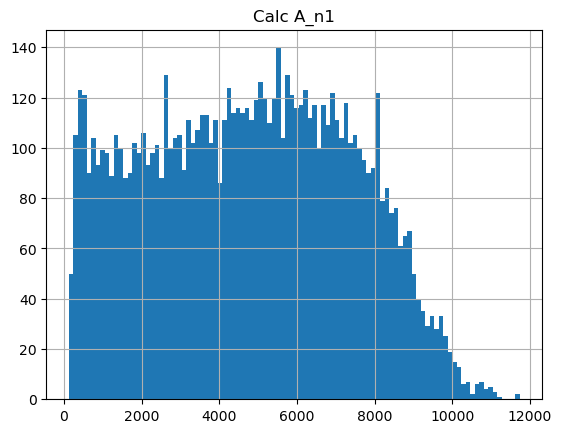

In [172]:
df.hist('Calc A_n1', bins=100)

In [186]:
# Trying to flag red 
df_test1 = df[['games', 'games_started', 'player_type', 'KP_Conf_Dif', 'X.Poss',  'X.Min',
                 'ORtg', 'Contribution_n1', 'Year_dif', 'stl_per_poss', 
                'blk_per_poss', 'DR.', 'KP_Rk_Dif', 'Calc A', 'Team_AdjEM_dif', 
                'Calc B', 'Class', 'Pos_Ht', 'Ht', 'Wt', 'Calc_A_Contr']]

#'Team_AdjEM_dif', 'X.Min_n1', 'X.Poss_n1',
#df_test1 = df_test1[df_test1['player_type']==0]
columns = list(df_test1.columns)
columns.remove('Contribution_n1')
columns.remove('Calc_A_Contr')
#columns.remove('player_type')
keep_col = []
rem_columns = columns
check = True
accuracy_end = 0
while len(rem_columns)>0 and check == True:
    acc_check = 0

    for col in rem_columns:
        X = df_test1[keep_col + [col]]
    # X = df_test1[['player_type', 'X.Poss', 'X.Min', 'X.Min_n1', 'ORtg', 
    #                       'Year_dif', 'stl_per_poss', 'blk_per_poss', 
    #                       'DR.', 'KP_Rk_Dif', 'Calc A']]
        #y = df_test1[['Contribution_n1']]
        y = df_test1[['Calc_A_Contr']]
        # Model
        seed = 7
        test_size = 0.2
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
        model = XGBClassifier()
        model.fit(X_train, y_train)

        # Find Accuracy
        y_pred = model.predict(X_test)
        predictions = [round(value) for value in y_pred]
        accuracy = accuracy_score(y_test, predictions)
        print(keep_col + [col])
        print("Accuracy: ", accuracy * 100)
        if accuracy > acc_check:
            acc_check = accuracy
            col_to_add = col
            check = True
    #print("Adding: ", col_to_add)
    
    print("Rem Columns: ", rem_columns)
    #keep_col = keep_col + [col_to_add]
    if accuracy_end < acc_check:
        print("Adding: ", col_to_add)
        print("Rem Columns: ", rem_columns)
        accuracy_end = acc_check
        rem_columns.remove(col_to_add)
        keep_col = keep_col + [col_to_add]
    else:
        print("Fails", accuracy_end, acc_check)
        check = False
    print(keep_col)
    

['games']
Accuracy:  27.619624470018174
['games_started']
Accuracy:  31.677771047849788
['player_type']
Accuracy:  25.802543912780134
['KP_Conf_Dif']
Accuracy:  26.408237431859476
['X.Poss']
Accuracy:  24.651726226529377
['X.Min']
Accuracy:  34.52453058752271
['ORtg']
Accuracy:  28.649303452453058
['Year_dif']
Accuracy:  27.316777710478497
['stl_per_poss']
Accuracy:  28.10417928528165
['blk_per_poss']
Accuracy:  27.559055118110237
['DR.']
Accuracy:  23.62204724409449
['KP_Rk_Dif']
Accuracy:  26.468806783767413
['Calc A']
Accuracy:  36.15990308903695
['Team_AdjEM_dif']
Accuracy:  25.620835857056328
['Calc B']
Accuracy:  24.348879466989704
['Class']
Accuracy:  27.135069654754695
['Pos_Ht']
Accuracy:  26.83222289521502
['Ht']
Accuracy:  27.135069654754695
['Wt']
Accuracy:  25.681405208964264
Rem Columns:  ['games', 'games_started', 'player_type', 'KP_Conf_Dif', 'X.Poss', 'X.Min', 'ORtg', 'Year_dif', 'stl_per_poss', 'blk_per_poss', 'DR.', 'KP_Rk_Dif', 'Calc A', 'Team_AdjEM_dif', 'Calc B', 

In [189]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import neighbors
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier

df_test1 = df[['games', 'games_started',  'KP_Conf_Dif', 'X.Poss',  
                  'Contribution_n1', 'Year_dif', 'stl_per_poss', 
                'blk_per_poss', 'DR.', 'Calc A', 'Team_AdjEM_dif', 
                'Calc B', 'Class', 'Pos_Ht', 'Ht', 'Wt', 'ORtg', 'X.Min', 'Calc_A_Contr']]
#'player_type', 'KP_Rk_Dif', 'ORtg', 'X.Min',
#'Team_AdjEM_dif', 'X.Min_n1', 'X.Poss_n1',
#df_test1 = df_test1[df_test1['player_type']==0]
columns = list(df_test1.columns)
columns.remove('Contribution_n1')
columns.remove('Calc_A_Contr')
#columns.remove('player_type')
keep_col = []
rem_columns = columns
check = True
accuracy_end = 0
while len(rem_columns)>0 and check == True:
    acc_check = 0

    for col in rem_columns:
        X = df_test1[keep_col + [col]]
    # X = df_test1[['player_type', 'X.Poss', 'X.Min', 'X.Min_n1', 'ORtg', 
    #                       'Year_dif', 'stl_per_poss', 'blk_per_poss', 
    #                       'DR.', 'KP_Rk_Dif', 'Calc A']]
        #y = df_test1[['Contribution_n1']]
        y = df_test1[['Calc_A_Contr']]
        # Model
        seed = 7
        test_size = 0.1
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
        # Random Forrest
        # model = RandomForestClassifier()
        # model.fit(X_train, y_train)

        # Naive-Bayes
        # model = GaussianNB()
        # model.fit(X_train, y_train)

        # Nearest Neighbors
        # model = neighbors.KNeighborsClassifier()
        # model.fit(X_train, y_train)

        # Support Vector Machine
        # model = svm.SVC(kernel='linear')
        # model.fit(X_train, y_train)
        
        # Gradient Boosting Classifier
        model = GradientBoostingClassifier()
        model.fit(X_train, y_train)
    
        # Find Accuracy
        accuracy = model.score(X_test, y_test)
        # y_pred = model.predict(X_test)
        # predictions = [round(value) for value in y_pred]
        # accuracy = accuracy_score(y_test, predictions)
        print(keep_col + [col])
        print("Accuracy: ", accuracy * 100)
        if accuracy > acc_check:
            acc_check = accuracy
            col_to_add = col
            check = True
    #print("Adding: ", col_to_add)
    
    print("Rem Columns: ", rem_columns)
    #keep_col = keep_col + [col_to_add]
    if accuracy_end < acc_check:
        print("Adding: ", col_to_add)
        print("Rem Columns: ", rem_columns)
        accuracy_end = acc_check
        rem_columns.remove(col_to_add)
        keep_col = keep_col + [col_to_add]
    else:
        print("Fails", accuracy_end, acc_check)
        check = False
    print(keep_col)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['games']
Accuracy:  28.692493946731233


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['games_started']
Accuracy:  32.68765133171913


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['KP_Conf_Dif']
Accuracy:  25.907990314769975


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['X.Poss']
Accuracy:  28.329297820823246


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Year_dif']
Accuracy:  28.692493946731233


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['stl_per_poss']
Accuracy:  28.934624697336563


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['blk_per_poss']
Accuracy:  27.11864406779661


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['DR.']
Accuracy:  28.45036319612591


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Calc A']
Accuracy:  36.92493946731235


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Team_AdjEM_dif']
Accuracy:  26.997578692493946


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Calc B']
Accuracy:  26.634382566585955


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Class']
Accuracy:  27.966101694915253


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Pos_Ht']
Accuracy:  28.087167070217916


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Ht']
Accuracy:  27.72397094430993


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Wt']
Accuracy:  27.966101694915253


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['ORtg']
Accuracy:  30.750605326876514


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['X.Min']
Accuracy:  34.866828087167065
Rem Columns:  ['games', 'games_started', 'KP_Conf_Dif', 'X.Poss', 'Year_dif', 'stl_per_poss', 'blk_per_poss', 'DR.', 'Calc A', 'Team_AdjEM_dif', 'Calc B', 'Class', 'Pos_Ht', 'Ht', 'Wt', 'ORtg', 'X.Min']
Adding:  Calc A
Rem Columns:  ['games', 'games_started', 'KP_Conf_Dif', 'X.Poss', 'Year_dif', 'stl_per_poss', 'blk_per_poss', 'DR.', 'Calc A', 'Team_AdjEM_dif', 'Calc B', 'Class', 'Pos_Ht', 'Ht', 'Wt', 'ORtg', 'X.Min']
['Calc A']


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Calc A', 'games']
Accuracy:  35.95641646489104


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Calc A', 'games_started']
Accuracy:  36.56174334140436


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Calc A', 'KP_Conf_Dif']
Accuracy:  37.167070217917676


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Calc A', 'X.Poss']
Accuracy:  36.077481840193705


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Calc A', 'Year_dif']
Accuracy:  36.92493946731235


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Calc A', 'stl_per_poss']
Accuracy:  37.167070217917676


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Calc A', 'blk_per_poss']
Accuracy:  36.803874092009686


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Calc A', 'DR.']
Accuracy:  37.28813559322034


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Calc A', 'Team_AdjEM_dif']
Accuracy:  36.440677966101696


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Calc A', 'Calc B']
Accuracy:  37.530266343825666


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Calc A', 'Class']
Accuracy:  37.530266343825666


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Calc A', 'Pos_Ht']
Accuracy:  37.28813559322034


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Calc A', 'Ht']
Accuracy:  36.31961259079903


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Calc A', 'Wt']
Accuracy:  36.077481840193705


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Calc A', 'ORtg']
Accuracy:  36.92493946731235


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Calc A', 'X.Min']
Accuracy:  38.37772397094431
Rem Columns:  ['games', 'games_started', 'KP_Conf_Dif', 'X.Poss', 'Year_dif', 'stl_per_poss', 'blk_per_poss', 'DR.', 'Team_AdjEM_dif', 'Calc B', 'Class', 'Pos_Ht', 'Ht', 'Wt', 'ORtg', 'X.Min']
Adding:  X.Min
Rem Columns:  ['games', 'games_started', 'KP_Conf_Dif', 'X.Poss', 'Year_dif', 'stl_per_poss', 'blk_per_poss', 'DR.', 'Team_AdjEM_dif', 'Calc B', 'Class', 'Pos_Ht', 'Ht', 'Wt', 'ORtg', 'X.Min']
['Calc A', 'X.Min']


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Calc A', 'X.Min', 'games']
Accuracy:  36.077481840193705


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Calc A', 'X.Min', 'games_started']
Accuracy:  36.92493946731235


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Calc A', 'X.Min', 'KP_Conf_Dif']
Accuracy:  36.68280871670702


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Calc A', 'X.Min', 'X.Poss']
Accuracy:  35.714285714285715


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Calc A', 'X.Min', 'Year_dif']
Accuracy:  37.04600484261501


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Calc A', 'X.Min', 'stl_per_poss']
Accuracy:  37.167070217917676


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Calc A', 'X.Min', 'blk_per_poss']
Accuracy:  37.65133171912833


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Calc A', 'X.Min', 'DR.']
Accuracy:  38.49878934624697


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Calc A', 'X.Min', 'Team_AdjEM_dif']
Accuracy:  36.19854721549637


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Calc A', 'X.Min', 'Calc B']
Accuracy:  37.530266343825666


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Calc A', 'X.Min', 'Class']
Accuracy:  37.530266343825666


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Calc A', 'X.Min', 'Pos_Ht']
Accuracy:  37.409200968523


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Calc A', 'X.Min', 'Ht']
Accuracy:  37.167070217917676


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Calc A', 'X.Min', 'Wt']
Accuracy:  38.13559322033898


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Calc A', 'X.Min', 'ORtg']
Accuracy:  36.56174334140436
Rem Columns:  ['games', 'games_started', 'KP_Conf_Dif', 'X.Poss', 'Year_dif', 'stl_per_poss', 'blk_per_poss', 'DR.', 'Team_AdjEM_dif', 'Calc B', 'Class', 'Pos_Ht', 'Ht', 'Wt', 'ORtg']
Adding:  DR.
Rem Columns:  ['games', 'games_started', 'KP_Conf_Dif', 'X.Poss', 'Year_dif', 'stl_per_poss', 'blk_per_poss', 'DR.', 'Team_AdjEM_dif', 'Calc B', 'Class', 'Pos_Ht', 'Ht', 'Wt', 'ORtg']
['Calc A', 'X.Min', 'DR.']


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Calc A', 'X.Min', 'DR.', 'games']
Accuracy:  37.167070217917676


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Calc A', 'X.Min', 'DR.', 'games_started']
Accuracy:  36.803874092009686


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Calc A', 'X.Min', 'DR.', 'KP_Conf_Dif']
Accuracy:  37.65133171912833


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Calc A', 'X.Min', 'DR.', 'X.Poss']
Accuracy:  38.37772397094431


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Calc A', 'X.Min', 'DR.', 'Year_dif']
Accuracy:  37.77239709443099


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Calc A', 'X.Min', 'DR.', 'stl_per_poss']
Accuracy:  38.49878934624697


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Calc A', 'X.Min', 'DR.', 'blk_per_poss']
Accuracy:  38.619854721549636


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Calc A', 'X.Min', 'DR.', 'Team_AdjEM_dif']
Accuracy:  36.31961259079903


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Calc A', 'X.Min', 'DR.', 'Calc B']
Accuracy:  37.893462469733656


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Calc A', 'X.Min', 'DR.', 'Class']
Accuracy:  37.28813559322034


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Calc A', 'X.Min', 'DR.', 'Pos_Ht']
Accuracy:  38.619854721549636


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Calc A', 'X.Min', 'DR.', 'Ht']
Accuracy:  38.37772397094431


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Calc A', 'X.Min', 'DR.', 'Wt']
Accuracy:  38.619854721549636


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Calc A', 'X.Min', 'DR.', 'ORtg']
Accuracy:  36.68280871670702
Rem Columns:  ['games', 'games_started', 'KP_Conf_Dif', 'X.Poss', 'Year_dif', 'stl_per_poss', 'blk_per_poss', 'Team_AdjEM_dif', 'Calc B', 'Class', 'Pos_Ht', 'Ht', 'Wt', 'ORtg']
Adding:  blk_per_poss
Rem Columns:  ['games', 'games_started', 'KP_Conf_Dif', 'X.Poss', 'Year_dif', 'stl_per_poss', 'blk_per_poss', 'Team_AdjEM_dif', 'Calc B', 'Class', 'Pos_Ht', 'Ht', 'Wt', 'ORtg']
['Calc A', 'X.Min', 'DR.', 'blk_per_poss']


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Calc A', 'X.Min', 'DR.', 'blk_per_poss', 'games']
Accuracy:  38.13559322033898


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Calc A', 'X.Min', 'DR.', 'blk_per_poss', 'games_started']
Accuracy:  38.256658595641646


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Calc A', 'X.Min', 'DR.', 'blk_per_poss', 'KP_Conf_Dif']
Accuracy:  37.530266343825666


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Calc A', 'X.Min', 'DR.', 'blk_per_poss', 'X.Poss']
Accuracy:  37.530266343825666


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Calc A', 'X.Min', 'DR.', 'blk_per_poss', 'Year_dif']
Accuracy:  38.256658595641646


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Calc A', 'X.Min', 'DR.', 'blk_per_poss', 'stl_per_poss']
Accuracy:  37.530266343825666


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Calc A', 'X.Min', 'DR.', 'blk_per_poss', 'Team_AdjEM_dif']
Accuracy:  37.530266343825666


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Calc A', 'X.Min', 'DR.', 'blk_per_poss', 'Calc B']
Accuracy:  38.13559322033898


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Calc A', 'X.Min', 'DR.', 'blk_per_poss', 'Class']
Accuracy:  38.256658595641646


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Calc A', 'X.Min', 'DR.', 'blk_per_poss', 'Pos_Ht']
Accuracy:  39.22518159806295


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Calc A', 'X.Min', 'DR.', 'blk_per_poss', 'Ht']
Accuracy:  39.10411622276029


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Calc A', 'X.Min', 'DR.', 'blk_per_poss', 'Wt']
Accuracy:  37.77239709443099


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Calc A', 'X.Min', 'DR.', 'blk_per_poss', 'ORtg']
Accuracy:  36.803874092009686
Rem Columns:  ['games', 'games_started', 'KP_Conf_Dif', 'X.Poss', 'Year_dif', 'stl_per_poss', 'Team_AdjEM_dif', 'Calc B', 'Class', 'Pos_Ht', 'Ht', 'Wt', 'ORtg']
Adding:  Pos_Ht
Rem Columns:  ['games', 'games_started', 'KP_Conf_Dif', 'X.Poss', 'Year_dif', 'stl_per_poss', 'Team_AdjEM_dif', 'Calc B', 'Class', 'Pos_Ht', 'Ht', 'Wt', 'ORtg']
['Calc A', 'X.Min', 'DR.', 'blk_per_poss', 'Pos_Ht']


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Calc A', 'X.Min', 'DR.', 'blk_per_poss', 'Pos_Ht', 'games']
Accuracy:  40.0726392251816


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Calc A', 'X.Min', 'DR.', 'blk_per_poss', 'Pos_Ht', 'games_started']
Accuracy:  38.7409200968523


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Calc A', 'X.Min', 'DR.', 'blk_per_poss', 'Pos_Ht', 'KP_Conf_Dif']
Accuracy:  38.619854721549636


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Calc A', 'X.Min', 'DR.', 'blk_per_poss', 'Pos_Ht', 'X.Poss']
Accuracy:  38.01452784503632


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Calc A', 'X.Min', 'DR.', 'blk_per_poss', 'Pos_Ht', 'Year_dif']
Accuracy:  38.7409200968523


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Calc A', 'X.Min', 'DR.', 'blk_per_poss', 'Pos_Ht', 'stl_per_poss']
Accuracy:  38.86198547215496


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Calc A', 'X.Min', 'DR.', 'blk_per_poss', 'Pos_Ht', 'Team_AdjEM_dif']
Accuracy:  37.77239709443099


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Calc A', 'X.Min', 'DR.', 'blk_per_poss', 'Pos_Ht', 'Calc B']
Accuracy:  37.893462469733656


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Calc A', 'X.Min', 'DR.', 'blk_per_poss', 'Pos_Ht', 'Class']
Accuracy:  39.22518159806295


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Calc A', 'X.Min', 'DR.', 'blk_per_poss', 'Pos_Ht', 'Ht']
Accuracy:  39.10411622276029


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Calc A', 'X.Min', 'DR.', 'blk_per_poss', 'Pos_Ht', 'Wt']
Accuracy:  37.893462469733656


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Calc A', 'X.Min', 'DR.', 'blk_per_poss', 'Pos_Ht', 'ORtg']
Accuracy:  37.167070217917676
Rem Columns:  ['games', 'games_started', 'KP_Conf_Dif', 'X.Poss', 'Year_dif', 'stl_per_poss', 'Team_AdjEM_dif', 'Calc B', 'Class', 'Ht', 'Wt', 'ORtg']
Adding:  games
Rem Columns:  ['games', 'games_started', 'KP_Conf_Dif', 'X.Poss', 'Year_dif', 'stl_per_poss', 'Team_AdjEM_dif', 'Calc B', 'Class', 'Ht', 'Wt', 'ORtg']
['Calc A', 'X.Min', 'DR.', 'blk_per_poss', 'Pos_Ht', 'games']


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Calc A', 'X.Min', 'DR.', 'blk_per_poss', 'Pos_Ht', 'games', 'games_started']
Accuracy:  38.01452784503632


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Calc A', 'X.Min', 'DR.', 'blk_per_poss', 'Pos_Ht', 'games', 'KP_Conf_Dif']
Accuracy:  39.22518159806295


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Calc A', 'X.Min', 'DR.', 'blk_per_poss', 'Pos_Ht', 'games', 'X.Poss']
Accuracy:  38.37772397094431


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Calc A', 'X.Min', 'DR.', 'blk_per_poss', 'Pos_Ht', 'games', 'Year_dif']
Accuracy:  38.86198547215496


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Calc A', 'X.Min', 'DR.', 'blk_per_poss', 'Pos_Ht', 'games', 'stl_per_poss']
Accuracy:  37.04600484261501


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Calc A', 'X.Min', 'DR.', 'blk_per_poss', 'Pos_Ht', 'games', 'Team_AdjEM_dif']
Accuracy:  38.01452784503632


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Calc A', 'X.Min', 'DR.', 'blk_per_poss', 'Pos_Ht', 'games', 'Calc B']
Accuracy:  38.619854721549636


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Calc A', 'X.Min', 'DR.', 'blk_per_poss', 'Pos_Ht', 'games', 'Class']
Accuracy:  38.86198547215496


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Calc A', 'X.Min', 'DR.', 'blk_per_poss', 'Pos_Ht', 'games', 'Ht']
Accuracy:  38.983050847457626


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Calc A', 'X.Min', 'DR.', 'blk_per_poss', 'Pos_Ht', 'games', 'Wt']
Accuracy:  37.65133171912833


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Calc A', 'X.Min', 'DR.', 'blk_per_poss', 'Pos_Ht', 'games', 'ORtg']
Accuracy:  36.92493946731235
Rem Columns:  ['games_started', 'KP_Conf_Dif', 'X.Poss', 'Year_dif', 'stl_per_poss', 'Team_AdjEM_dif', 'Calc B', 'Class', 'Ht', 'Wt', 'ORtg']
Fails 0.400726392251816 0.3922518159806295
['Calc A', 'X.Min', 'DR.', 'blk_per_poss', 'Pos_Ht', 'games']


In [ ]:
newer = pd.DataFrame(zip(df.games, df['X.Poss']), columns=['Ht', 'X.Poss'])
newer

,Ht,X.Poss
0,32,13.8
1,34,16.9
2,30,24.1
3,30,18.8
4,9,20.7
...,...,...
10103,9,14.6
10104,21,16.3
10105,31,19.3
10106,22,22.2


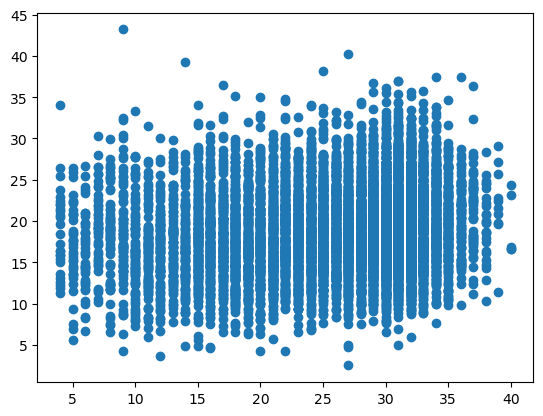

In [ ]:
plt.scatter(df['games'], df['X.Poss_n1'])
plt.show()

In [ ]:
df[df['games']<10].sort_values(by='X.Poss_n1', ascending=False)

,Unnamed: 0,player_type,Team,Team_n1,Unnamed..0_x,Player.Name,season,conf_abbr,games,games_started,mp_per_g,fg_per_g,fga_per_g,fg_pct,fg2_per_g,fg2a_per_g,fg2_pct,fg3_per_g,fg3a_per_g,fg3_pct,ft_per_g,fta_per_g,ft_pct,orb_per_g,drb_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,tov_per_g,pf_per_g,pts_per_g,sos,mp,fg,fga,fg2,fg2a,fg2_pct.1,fg3,fg3a,ft,fta,orb,drb,trb,ast,stl,blk,tov,pf,pts,fg_per_min,fga_per_min,fg2_per_min,fg2a_per_min,fg3_per_min,fg3a_per_min,ft_per_min,fta_per_min,trb_per_min,ast_per_min,stl_per_min,blk_per_min,tov_per_min,pf_per_min,pts_per_min,fg_per_poss,fga_per_poss,fg2_per_poss,fg2a_per_poss,fg3_per_poss,fg3a_per_poss,ft_per_poss,fta_per_poss,trb_per_poss,ast_per_poss,stl_per_poss,blk_per_poss,tov_per_poss,pf_per_poss,pts_per_poss,off_rtg,def_rtg,per,ts_pct,efg_pct,fg3a_per_fga_pct,fta_per_fga_pct,pprod,orb_pct,drb_pct,trb_pct,ast_pct,stl_pct,blk_pct,tov_pct,usg_pct,ows,dws,ws,ws_per_40,obpm,dbpm,bpm,year,Ht,Wt,Yr,G,S,X.Min,ORtg,X.Poss,X.Shots,eFG.,TS.,OR.,DR.,ARate,TORate,Blk.,Stl.,FC.40,FD.40,FTRate,FTM.A,Pct,X2PM.A,Pct.1,X3PM.A,Pct.2,X.Pct,X.2PM.A,X.Pct.1,Unnamed..0_x_n1,Player.Name_n1,season_n1,conf_abbr_n1,games_n1,games_started_n1,mp_per_g_n1,fg_per_g_n1,fga_per_g_n1,fg_pct_n1,fg2_per_g_n1,fg2a_per_g_n1,fg2_pct_n1,fg3_per_g_n1,fg3a_per_g_n1,fg3_pct_n1,ft_per_g_n1,fta_per_g_n1,ft_pct_n1,orb_per_g_n1,drb_per_g_n1,trb_per_g_n1,ast_per_g_n1,stl_per_g_n1,blk_per_g_n1,tov_per_g_n1,pf_per_g_n1,pts_per_g_n1,sos_n1,mp_n1,fg_n1,fga_n1,fg2_n1,fg2a_n1,fg2_pct.1_n1,fg3_n1,fg3a_n1,ft_n1,fta_n1,orb_n1,drb_n1,trb_n1,ast_n1,stl_n1,blk_n1,tov_n1,pf_n1,pts_n1,fg_per_min_n1,fga_per_min_n1,fg2_per_min_n1,fg2a_per_min_n1,fg3_per_min_n1,fg3a_per_min_n1,ft_per_min_n1,fta_per_min_n1,trb_per_min_n1,ast_per_min_n1,stl_per_min_n1,blk_per_min_n1,tov_per_min_n1,pf_per_min_n1,pts_per_min_n1,fg_per_poss_n1,fga_per_poss_n1,fg2_per_poss_n1,fg2a_per_poss_n1,fg3_per_poss_n1,fg3a_per_poss_n1,ft_per_poss_n1,fta_per_poss_n1,trb_per_poss_n1,ast_per_poss_n1,stl_per_poss_n1,blk_per_poss_n1,tov_per_poss_n1,pf_per_poss_n1,pts_per_poss_n1,off_rtg_n1,def_rtg_n1,per_n1,ts_pct_n1,efg_pct_n1,fg3a_per_fga_pct_n1,fta_per_fga_pct_n1,pprod_n1,orb_pct_n1,drb_pct_n1,trb_pct_n1,ast_pct_n1,stl_pct_n1,blk_pct_n1,tov_pct_n1,usg_pct_n1,ows_n1,dws_n1,ws_n1,ws_per_40_n1,obpm_n1,dbpm_n1,bpm_n1,year_n1,Ht_n1,Wt_n1,Yr_n1,G_n1,S_n1,X.Min_n1,ORtg_n1,X.Poss_n1,X.Shots_n1,eFG._n1,TS._n1,OR._n1,DR._n1,ARate_n1,TORate_n1,Blk._n1,Stl._n1,FC.40_n1,FD.40_n1,FTRate_n1,FTM.A_n1,Pct_n1,X2PM.A_n1,Pct.1_n1,X3PM.A_n1,Pct.2_n1,X.Pct_n1,X.2PM.A_n1,X.Pct.1_n1,Season_x,TeamName_x,TeamName 2_x,Tempo_x,RankTempo_x,AdjTempo_x,RankAdjTempo_x,OE_x,RankOE_x,AdjOE_x,RankAdjOE_x,DE_x,RankDE_x,AdjDE_x,RankAdjDE_x,AdjEM_x,RankAdjEM_x,seed_x,Season_y,TeamName_y,TeamName 2_y,Tempo_y,RankTempo_y,AdjTempo_y,RankAdjTempo_y,OE_y,RankOE_y,AdjOE_y,RankAdjOE_y,DE_y,RankDE_y,AdjDE_y,RankAdjDE_y,AdjEM_y,RankAdjEM_y,seed_y,Season,TeamName,TeamName 2,Tempo,RankTempo,AdjTempo,RankAdjTempo,OE,RankOE,AdjOE,RankAdjOE,DE,RankDE,AdjDE,RankAdjDE,AdjEM,RankAdjEM,seed,Year_Conf_x,Conf_Abb_x,Conf_Rk_x,Conf_Full_x,Conf_Rating_x,Year_Conf_y,Conf_Abb_y,Conf_Rk_y,Conf_Full_y,Conf_Rating_y,Year_Conf,Conf_Abb,Conf_Rk,Conf_Full,Conf_Rating,Contribution_n1,Class,Pos_Ht,Year_dif,Team_AdjEM_dif,KP_Rk_Dif,KP_Conf_Dif,Calc A,Calc B
9582,9583,1,VALPARAISO,VALPARAISO,30237.0,sigurd-lorange-1,2019-20,MVC,9,0,6.7,1.0,1.9,0.529,0.3,0.8,0.429,0.7,1.1,0.600,0.2,0.2,1.000,0.0,0.2,0.2,0.6,0.1,0.0,0.3,0.0,2.9,1.17,60,9.0,17.0,3.0,7.0,0.429,6.0,10.0,2.0,2.0,0.0,2.0,2,5.0,1.0,0.0,3.0,0.0,26.0,6.0,11.3,2.0,4.7,4.0,6.7,1.3,1.3,1.3,3.3,0.7,0.0,2.0,0.0,17.3,8.6,16.3,2.9,6.7,5.8,9.6,1.9,1.9,1.9,4.8,1.0,0.0,2.9,0.0,24.9,128.1,110.0,19.3,0.724,0.706,0.588,0.118,22.0,0.0,4.0,1.9,16.7,1.0,0.0,14.3,17.7,0.2,0.0,0.2,0.144,1.0,-4.3,-3.3,2020.0,71,175.0,Fr,8,0.0,2.8,107.9,16.9,19.8,59.1,62.8,0.0,3.1,5.2,18.0,0.0,0.0,0.0,2.5,18.2,2-2,0.999,2-6,0.333,3-5,0.600,0.999,2-6,0.333,30238.0,sigurd-lorange-1,2020-21,MVC,8,0,5.0,0.8,2.5,0.300,0.5,0.5,1.000,0.3

In [ ]:
pd.set_option('display.max_columns', None)
df[(df['games']>40)]
    #& (df['year']==2022)]
#pd.options.display.max_columns
    # & (df['year']=='2023')) | ((df['games_n1']>39) & (df['year_n1']=='2023'))]
   # | 
#    ((df['games']>40) & (df['year']==2022)) | ((df['games_n1']>40) & (df['year_n1']==2022)) | 
#    ((df['games']>33) & (df['year']==2021)) | ((df['games_n1']>33) & (df['year_n1']==2021)) | 
#    ((df['games']>35) & (df['year']==2020)) | ((df['games_n1']>35) & (df['year_n1']==2020)) | 
#    ((df['games']>40) & (df['year']==2019)) | ((df['games_n1']>40) & (df['year_n1']==2019))]

,Unnamed: 0,player_type,Team,Team_n1,Unnamed..0_x,Player.Name,season,conf_abbr,games,games_started,mp_per_g,fg_per_g,fga_per_g,fg_pct,fg2_per_g,fg2a_per_g,fg2_pct,fg3_per_g,fg3a_per_g,fg3_pct,ft_per_g,fta_per_g,ft_pct,orb_per_g,drb_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,tov_per_g,pf_per_g,pts_per_g,sos,mp,fg,fga,fg2,fg2a,fg2_pct.1,fg3,fg3a,ft,fta,orb,drb,trb,ast,stl,blk,tov,pf,pts,fg_per_min,fga_per_min,fg2_per_min,fg2a_per_min,fg3_per_min,fg3a_per_min,ft_per_min,fta_per_min,trb_per_min,ast_per_min,stl_per_min,blk_per_min,tov_per_min,pf_per_min,pts_per_min,fg_per_poss,fga_per_poss,fg2_per_poss,fg2a_per_poss,fg3_per_poss,fg3a_per_poss,ft_per_poss,fta_per_poss,trb_per_poss,ast_per_poss,stl_per_poss,blk_per_poss,tov_per_poss,pf_per_poss,pts_per_poss,off_rtg,def_rtg,per,ts_pct,efg_pct,fg3a_per_fga_pct,fta_per_fga_pct,pprod,orb_pct,drb_pct,trb_pct,ast_pct,stl_pct,blk_pct,tov_pct,usg_pct,ows,dws,ws,ws_per_40,obpm,dbpm,bpm,year,Ht,Wt,Yr,G,S,X.Min,ORtg,X.Poss,X.Shots,eFG.,TS.,OR.,DR.,ARate,TORate,Blk.,Stl.,FC.40,FD.40,FTRate,FTM.A,Pct,X2PM.A,Pct.1,X3PM.A,Pct.2,X.Pct,X.2PM.A,X.Pct.1,Unnamed..0_x_n1,Player.Name_n1,season_n1,conf_abbr_n1,games_n1,games_started_n1,mp_per_g_n1,fg_per_g_n1,fga_per_g_n1,fg_pct_n1,fg2_per_g_n1,fg2a_per_g_n1,fg2_pct_n1,fg3_per_g_n1,fg3a_per_g_n1,fg3_pct_n1,ft_per_g_n1,fta_per_g_n1,ft_pct_n1,orb_per_g_n1,drb_per_g_n1,trb_per_g_n1,ast_per_g_n1,stl_per_g_n1,blk_per_g_n1,tov_per_g_n1,pf_per_g_n1,pts_per_g_n1,sos_n1,mp_n1,fg_n1,fga_n1,fg2_n1,fg2a_n1,fg2_pct.1_n1,fg3_n1,fg3a_n1,ft_n1,fta_n1,orb_n1,drb_n1,trb_n1,ast_n1,stl_n1,blk_n1,tov_n1,pf_n1,pts_n1,fg_per_min_n1,fga_per_min_n1,fg2_per_min_n1,fg2a_per_min_n1,fg3_per_min_n1,fg3a_per_min_n1,ft_per_min_n1,fta_per_min_n1,trb_per_min_n1,ast_per_min_n1,stl_per_min_n1,blk_per_min_n1,tov_per_min_n1,pf_per_min_n1,pts_per_min_n1,fg_per_poss_n1,fga_per_poss_n1,fg2_per_poss_n1,fg2a_per_poss_n1,fg3_per_poss_n1,fg3a_per_poss_n1,ft_per_poss_n1,fta_per_poss_n1,trb_per_poss_n1,ast_per_poss_n1,stl_per_poss_n1,blk_per_poss_n1,tov_per_poss_n1,pf_per_poss_n1,pts_per_poss_n1,off_rtg_n1,def_rtg_n1,per_n1,ts_pct_n1,efg_pct_n1,fg3a_per_fga_pct_n1,fta_per_fga_pct_n1,pprod_n1,orb_pct_n1,drb_pct_n1,trb_pct_n1,ast_pct_n1,stl_pct_n1,blk_pct_n1,tov_pct_n1,usg_pct_n1,ows_n1,dws_n1,ws_n1,ws_per_40_n1,obpm_n1,dbpm_n1,bpm_n1,year_n1,Ht_n1,Wt_n1,Yr_n1,G_n1,S_n1,X.Min_n1,ORtg_n1,X.Poss_n1,X.Shots_n1,eFG._n1,TS._n1,OR._n1,DR._n1,ARate_n1,TORate_n1,Blk._n1,Stl._n1,FC.40_n1,FD.40_n1,FTRate_n1,FTM.A_n1,Pct_n1,X2PM.A_n1,Pct.1_n1,X3PM.A_n1,Pct.2_n1,X.Pct_n1,X.2PM.A_n1,X.Pct.1_n1,Season_x,TeamName_x,TeamName 2_x,Tempo_x,RankTempo_x,AdjTempo_x,RankAdjTempo_x,OE_x,RankOE_x,AdjOE_x,RankAdjOE_x,DE_x,RankDE_x,AdjDE_x,RankAdjDE_x,AdjEM_x,RankAdjEM_x,seed_x,Season_y,TeamName_y,TeamName 2_y,Tempo_y,RankTempo_y,AdjTempo_y,RankAdjTempo_y,OE_y,RankOE_y,AdjOE_y,RankAdjOE_y,DE_y,RankDE_y,AdjDE_y,RankAdjDE_y,AdjEM_y,RankAdjEM_y,seed_y,Season,TeamName,TeamName 2,Tempo,RankTempo,AdjTempo,RankAdjTempo,OE,RankOE,AdjOE,RankAdjOE,DE,RankDE,AdjDE,RankAdjDE,AdjEM,RankAdjEM,seed,Year_Conf_x,Conf_Abb_x,Conf_Rk_x,Conf_Full_x,Conf_Rating_x,Year_Conf_y,Conf_Abb_y,Conf_Rk_y,Conf_Full_y,Conf_Rating_y,Year_Conf,Conf_Abb,Conf_Rk,Conf_Full,Conf_Rating,Contribution_n1,Class,Pos_Ht,Year_dif,Team_AdjEM_dif,KP_Rk_Dif,KP_Conf_Dif,Calc A,Calc B
1198,1199,1,UTAH TECH,UTAH TECH,26769.0,brock-gilbert-1,2020-21,WAC,49,16,13.0,0.6,1.6,0.375,0.3,0.5,0.500,0.3,1.1,0.315,0.3,0.5,0.625,0.3,1.2,1.5,2.6,0.5,0.0,1.4,1.0,1.9,-1.98,639,30.0,80.0,13.0,26.0,0.500,17.0,54.0,15.0,24.0,17.0,57.0,74,129.0,26.0,0.0,68.0,50.0,92.0,1.9,5.0,0.8,1.6,1.1,3.4,0.9,1.5,4.6,8.1,1.6,0.0,4.3,3.1,5.8,2.5,6.8,1.1,2.2,1.4,4.6,1.3,2.0,6.3,10.9,2.2,0.0,5.8,4.2,7.8,89.3,103.6,8.5,0.503,0.481,0.675,0.300,152.0,2.8,9.4,6.1,34.6,2.2,0.0,42.7,11.8,0.0,0.7,0.7,0.045,-3.9,-1.4,-5.3,0.0,70,160.0,Jr,16,2.0,23.3,88.6,11.1,4.3,50.0,54.3,3.0,6.8,37.2,46.8,0.0,1.2,3.6,1.7,36.4,3-4,0.75,1-2,0.5,3-9,0.333,0.750,1-2,0.500,26770.0,brock-gilbert-1,2021-22,WAC,12,2,11.2,0.3,0.7,0.375,0.1,0.1,

In [ ]:
print(df['year'].dtype)

float64
